In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h2>Loading the dataset</h2>

In [56]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Checking if there is any null value in the dataset</h2>

In [97]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>How many survived?</h2>

In [14]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# df_train['Survived'].value_counts()

/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


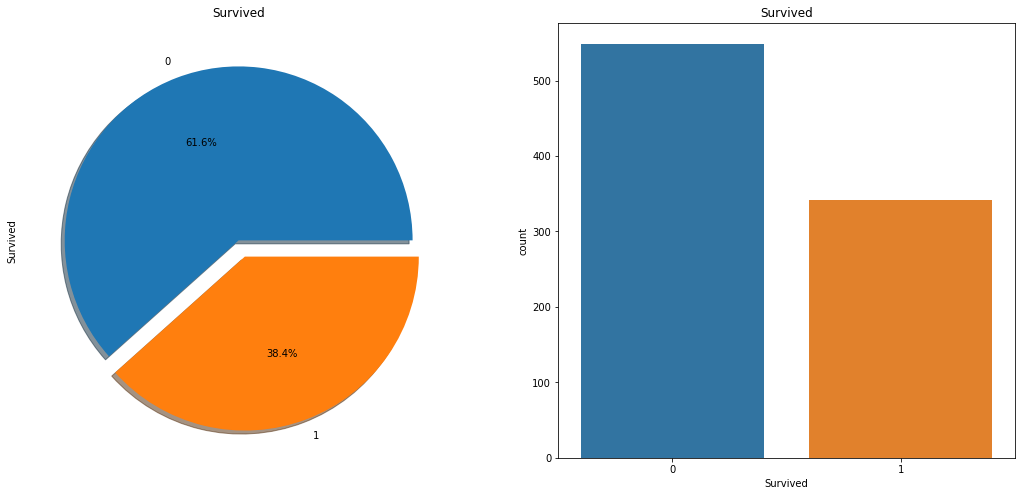

In [106]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<p>Only 350 of the 891 passengers in the training set survived the crash, or 38.4% of the entire training set. To better understand the data and determine which passenger groups actually made it and which ones didn't, we need to delve deeper.</p>

<h2>Types of Features</h2>

<h3>Categorical Features</h3>

<p>A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

<b>Categorical Features in the dataset: Sex, Embarked</b></p>


<h3>Ordinal Features:</h3>

<p>An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.</p>

<b>Ordinal Features in the dataset: PClass</b>

<h3>Continious Features:</h3>

<p>A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.</p>

<b>Continous Feature in the dataset: Age</b>

<h3>Analysing the features</h3>

In [107]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/home/jitu-fx516/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


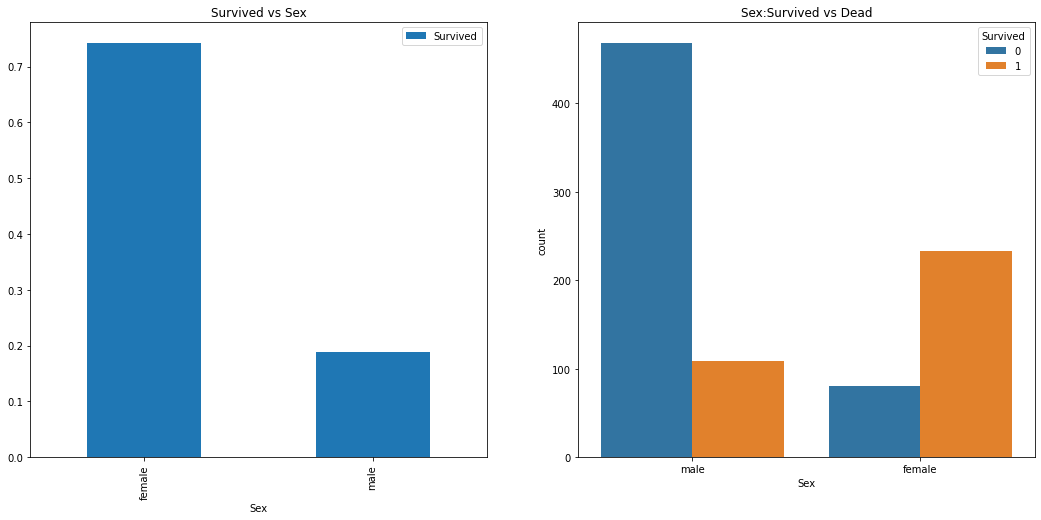

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

<h2>This is for example</h2>

<p>This seems to be intriguing. There are far more guys than women on the ship. However, the number of women saved is almost two times that of men. On the ship, women have a survival rate of about 75% while men have a rate of about 18–19%.</p>

/home/jitu-fx516/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


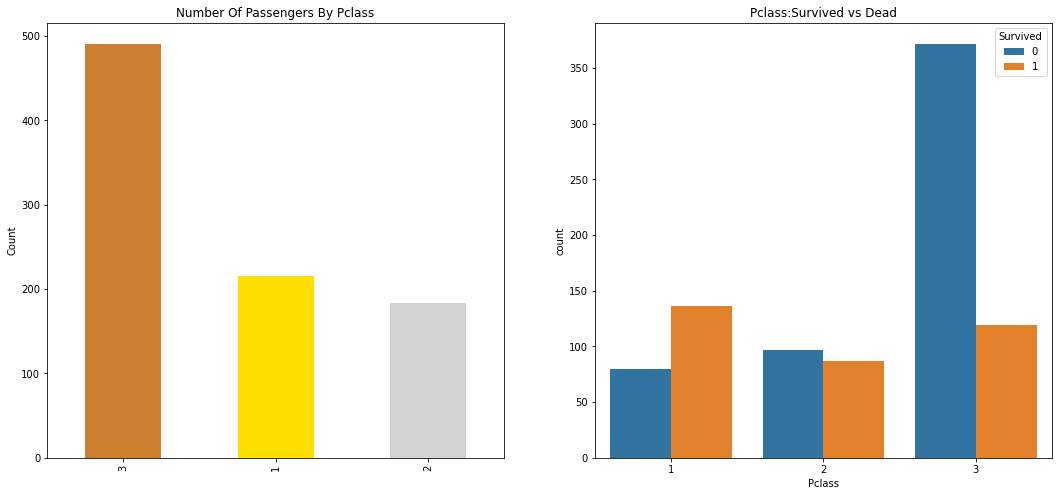

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [24]:
df_train[df_train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [26]:
df_train[df_train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [27]:
df_train[df_train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [30]:
df_train['Age'].mean()

29.69911764705882

<p>Passengers of Pclass 1 were given a very high priority during rescue, as is evident. Despite the fact that Pclass 3 had a significantly bigger number of passengers, very few of them survived.</p>

In [111]:
print('Oldest Passenger was of:',df_train['Age'].max(),'Years')
print('Youngest Passenger was of:',df_train['Age'].min(),'Years')
print('Average Age on the ship:',df_train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


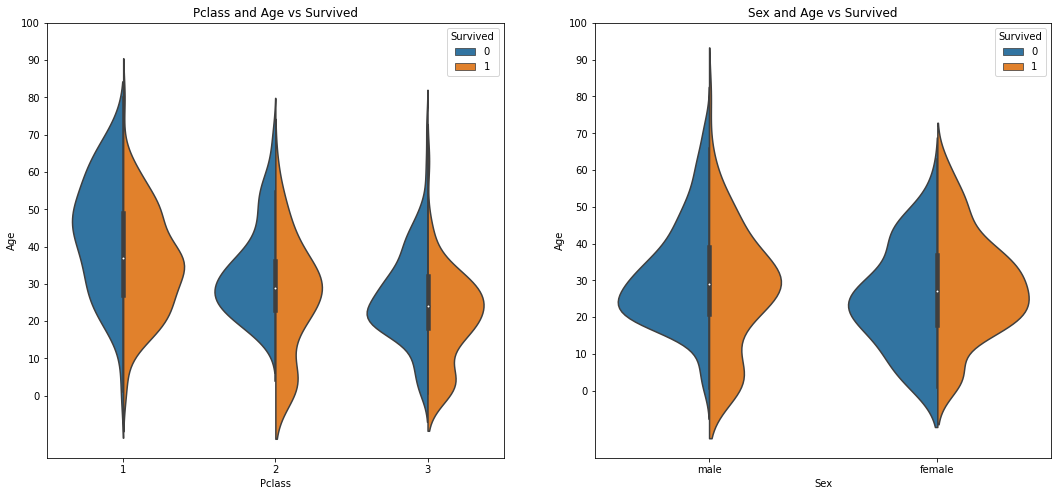

In [112]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<h3>Observations:</h3>
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

In [32]:
df_train['Age'].fillna(df_train['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [34]:
# df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

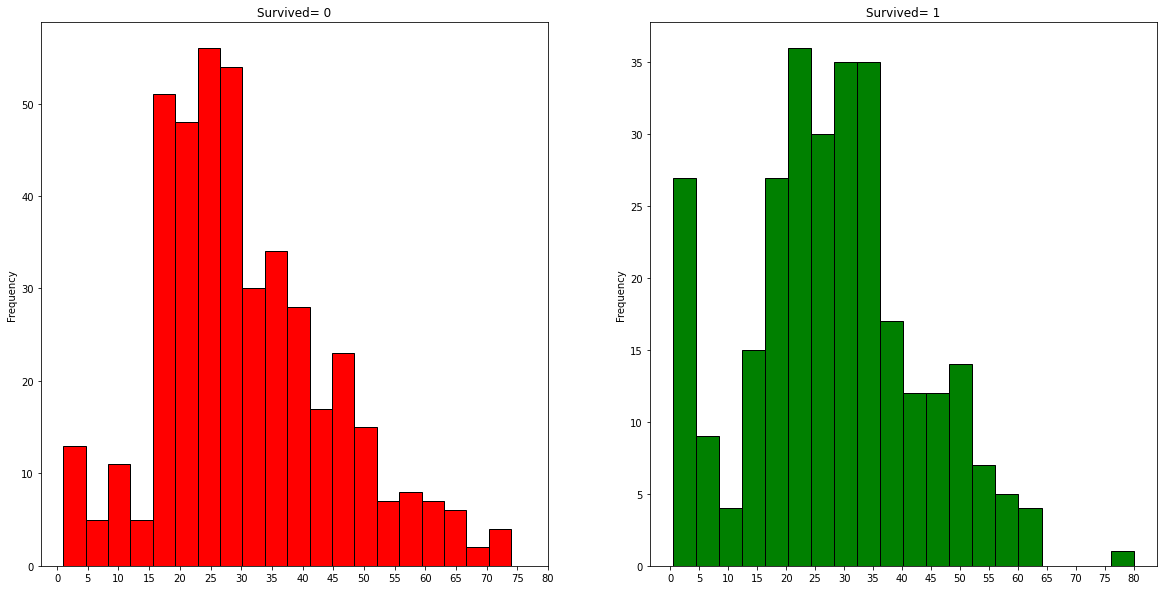

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<h3>Observations:</h3>

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/info/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/info/.local/lib/

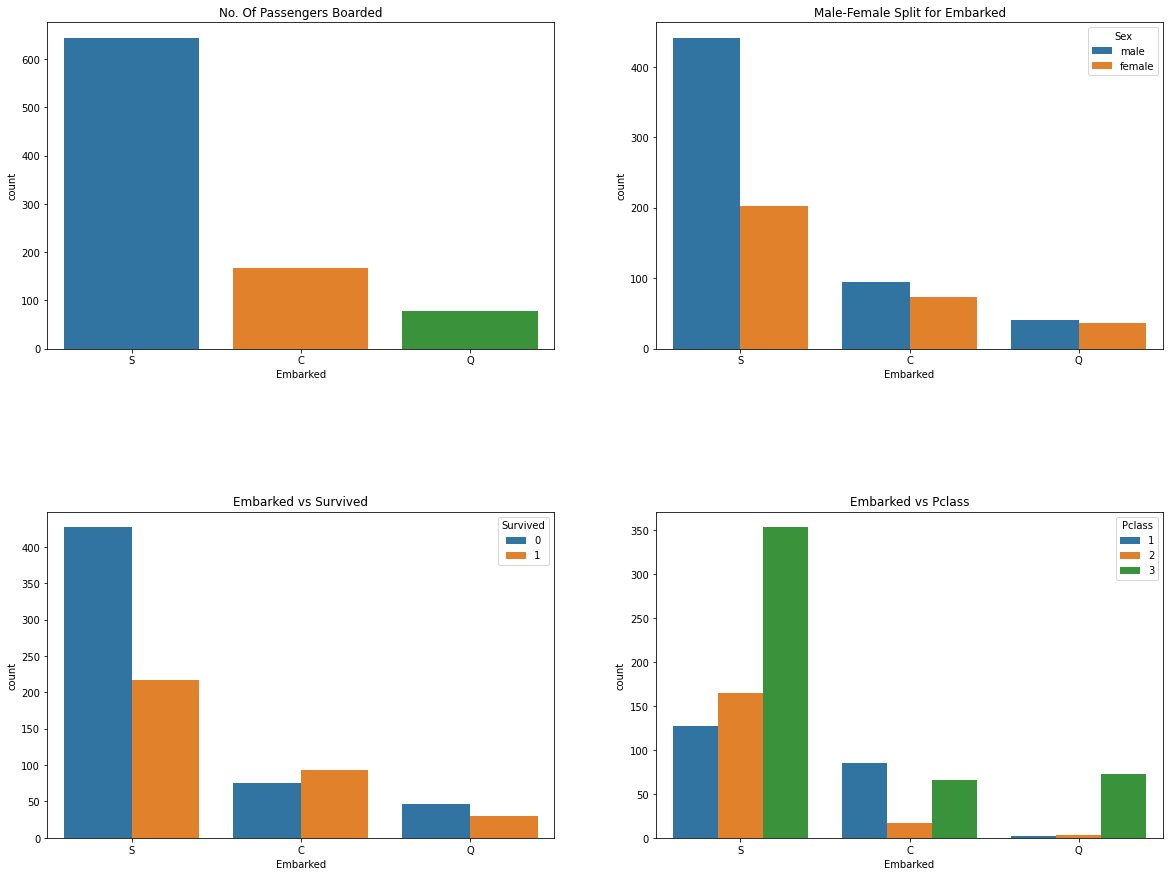

In [121]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<h3>Observations:</h3>

1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3

## Feature Preprocessing

In [57]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
df_train['Embarked'].fillna('S', inplace = True)

In [59]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

In [60]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [61]:
def change_gender(gender):
    if gender == 'male':
        return 0
    else:
        return 1

In [62]:
# df_train['Ticket'].unique()

In [63]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 1 if x == 'female' else 0 )

In [64]:
df_train.drop('Name', axis = 1, inplace = True)

In [65]:
df_train.drop('Ticket', axis = 1, inplace = True)

In [66]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
pd.get_dummies(df_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [68]:
embarked_df = pd.get_dummies(df_train['Embarked'])

In [69]:
embarked_df.shape

(891, 3)

In [70]:
df_train = pd.concat([df_train,embarked_df], axis = 1)

In [71]:
df_train.drop('Embarked', axis = 1, inplace = True)

In [72]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [73]:
df_train.drop('Cabin', axis = 1, inplace = True)

In [74]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [75]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


## Implementing machine learning model

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [78]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

In [79]:
models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb}

In [82]:
X,y = df_train.drop('Survived', axis = 1), df_train['Survived']

In [83]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 420)

In [84]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(train_X, train_y)
    predict = mod.predict(test_X)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(test_y, predict)})


In [86]:
model_accuracy

{'svc': 0.6201117318435754,
 'knn': 0.6424581005586593,
 'dtc': 0.8100558659217877,
 'nb': 0.7877094972067039}

In [87]:
mod

GaussianNB()

## Feature Selection

In [230]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


In [231]:
selected_features = ['Survived','Pclass','Sex','Fare','C','Q','S']

In [232]:
df_train_selected = df_train[selected_features]

In [233]:
X,y = df_train_selected.drop('Survived', axis = 1), df['Survived']

In [234]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 420)

In [235]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(train_X, train_y)
    predict = mod.predict(test_X)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(test_y, predict)})

In [236]:
model_accuracy

{'svc': 0.6815642458100558,
 'knn': 0.7653631284916201,
 'dtc': 0.8100558659217877,
 'nb': 0.776536312849162}

In [76]:
mod

NameError: name 'mod' is not defined